__________________________
# Design Issues in Noninferiority/Equivalance Trials
__________________________

**Goal**: Generate sample size or power estimates for non-inferiority equivalance trials when data is either normally or binomially distributed datasets.

**Background.** This repository provides sample size or power estimates for various trial types: non-inferiority, equivalence, superiority, and superiority to placebo, assuming normally distributed data. Additionally, it offers sample size or power estimates for non-inferiority and equivalence trials with binomially distributed data. For a comprehensive guide on when and how to apply the sample size and power calculations presented here, please refer to Hwang and Moriwaka (1999) [https://doi.org/10.1177/009286159903300424].

**Usage of the sample size and Power Estimation Function**

To use the function below, researchers must specify the trial type, distribution, delta, sigma, alpha, and either sample size (n) or power, but not both.

Definition of Variables:

- **Trial -** Noninferiority, Equivalence, Superiority and superiority-to-placebo 
- **Distribution -** Normal or Binomial
- **Delta -** Difference between the treatment and control groups ($\delta$). Also called Noninferiority or Equivalence margins 
- **Sigma -** Standard deviation ($\sigma$)
- **Alpha -** Type I error ($\alpha$) - probability of rejecting null hypothesis when null is true
- **n -** Sample size 
- **power -** Probability of rejecting null hypothesis when null is false (1-$\beta$) 
 

__________________________
**Formulas**
__________________________

**1. Non-inferiority Trial - Normally Distributed Data**

<span style="color:cyan">
Sample size
</span>

- n = 2 $[(z_{1-\alpha} + z_{1-\beta})({\sigma}/{\delta})]^{2}$
 
<span style="color:cyan">
Power
</span>

power = 2 $\Phi[\delta (2\sigma^{2}/n) ^{-1/2} - z_{1-\alpha}]$


**2. Equivalence Trial - Normally Distributed Data**

<span style="color:cyan">
Sample size
</span>


- n = 2 $[(z_{1-\alpha} + z_{1-\beta/2})({\sigma}/{\delta})]^{2}$
 
<span style="color:cyan">
Power
</span>

power = 2 $\Phi[\delta (2\sigma^{2}/n)^{-1/2} - z_{1-\alpha}] - 1$

**3. Superiority Trial - Normally Distributed Data**

<span style="color:cyan">
Sample size
</span>


- n = 2 $[(z_{1-\alpha} + z_{1-\beta})({\sigma}/{\epsilon})]^{2}$
 
<span style="color:cyan">
Power
</span>

power = $\Phi[\epsilon (2\sigma^{2}/n) ^{-1/2} - z_{1-\alpha}]$

**4. Superiority to Placebo Trial - Normally Distributed Data**

<span style="color:cyan">
Sample size
</span>


- n = 2 $[(z_{1-\alpha} + z_{1-\beta})({\sigma}/{\Delta})]^{2}$
 
<span style="color:cyan">
Power
</span>

power = $\Phi[\Delta (2\sigma^{2}/n) ^{-1/2} - z_{1-\alpha}]$

**5. Noninferiority Trial - Binomially Distributed Data**

<span style="color:cyan">
Sample size
</span>


- n = 2 $(\pi(1-\pi)\delta^{-2})(z_{1-\alpha} + z_{1-\beta})$
 
<span style="color:cyan">
Power
</span>

power = $\Phi[\delta((\pi(1-\pi)(2/n)))^{-1/2} - z_{1-\alpha}]$

**6. Equivalence Trial - Binomially Distributed Data**

<span style="color:cyan">
Sample size
</span>


- n = 2 $\{\pi(1-\pi)\delta^{-2}\}(z_{1-\alpha} + z_{1-\beta/2})^{2}$
 
<span style="color:cyan">
Power
</span>

power = $\Phi[\delta\{ \pi(1-\pi)(2/n)\}^{-1/2} - z_{1-\alpha}] - 1$
 
 

__________________________
# Sample size and Power Estimation Function
__________________________

In [173]:
# libraries
import math
from scipy.stats import norm
import pandas as pd

def func_trial_description(trial_var):
    ''''
    Trial description
    '''
    if trial_var == "noninfer":
        trial_description = "Non-Inferiority"
    elif trial_var == "equiv":
        trial_description = "Equivalence"
    elif trial_var == "super":
        trial_description = "Superiority"
    elif trial_var == "supertoplacebo":
        trial_description = "Superiority to Placebo" 

    return(trial_description)

def func_distribution_description(distr_var):
    ''''
    Distribution description
    '''
    if distr_var == "normal":
        distr_description = "normally distributed"
    elif distr_var == "binomial":
        distr_description = "binomially distributed"
    return(distr_description)
 
def func_res_dsn(trial, distr,  delta, sigma, alpha, pi_val, n,  power):
     '''
     Ouput dataset
     '''
     dsn = pd.DataFrame({'trial': trial, 'delta': delta, 'sigma': sigma, 'alpha':alpha,'pi_val': pi_val,  'power': power, "n":n}, index=[1])
     return(dsn)


def func_calc(trial, distr,  delta, sigma, alpha, pi_val, n,  power):
    ''''
    Given sample size (n) - estimate power
    Given power - estimate sample size (n)
    '''
    if power>0:
        beta = 1 - power

    if (trial == "noninfer" and distr=="normal"):

        factor1 = norm.ppf(1 - alpha) 

        if math.isnan(n):

            factor2 = norm.ppf(1 - beta) 
            n = 2*((factor1 + factor2)*(sigma/delta) )**2
            print("Estimated sample size (n): " +func_trial_description(trial_var=trial) + " trial for " + func_distribution_description(distr_var=distr) + " data ")
            res = func_res_dsn(trial=trial, distr=distr,  delta=delta, sigma=sigma, alpha=alpha, pi_val=pi_val,  n=n,  power=power)
            return(res)
      
        elif math.isnan(power):

            factor2 =  delta*(   ((2*sigma**2/n))**(-1/2)  )
            diff = factor2 - factor1
            power = norm.cdf(diff, loc=0, scale=1) * 100
            print("Estimated power: " +func_trial_description(trial_var=trial) + " trial for " + func_distribution_description(distr_var=distr) + " data ")
            return(func_res_dsn(trial=trial, distr=distr,  delta=delta, sigma=sigma, alpha=alpha, pi_val=pi_val,  n=n,  power=power))
        
    if (trial == "equiv" and distr=="normal"):

        factor1 = norm.ppf(1 - alpha) 

        if math.isnan(n):

            factor2 = norm.ppf(1 - beta/2) 
            n = 2*((factor1 + factor2)*(sigma/delta) )**2
            print("Estimated sample size (n): " +func_trial_description(trial_var=trial) + " trial for " + func_distribution_description(distr_var=distr) + " data ")
            return(func_res_dsn(trial=trial, distr=distr,  delta=delta, sigma=sigma, alpha=alpha, pi_val=pi_val,  n=n,  power=power))
      
        elif math.isnan(power):

            factor2 = delta*(   ((2*sigma**2/n))**(-1/2)  )
            diff = factor2 - factor1
            power =( 2 * (norm.cdf(diff, loc=0, scale=1) ) - 1 ) * 100
            print("Estimated power: " +func_trial_description(trial_var=trial) + " trial for " + func_distribution_description(distr_var=distr) + " data ")
            return(func_res_dsn(trial=trial, distr=distr,  delta=delta, sigma=sigma, alpha=alpha, pi_val=pi_val,  n=n,  power=power))       

    if (trial == "super" and distr=="normal"):

        factor1 = norm.ppf(1 - alpha) 
    
        if math.isnan(n):

            factor2 = norm.ppf(1 - beta) 
            n = 2*((factor1 + factor2)*(sigma/delta) )**2
            print("Estimated sample size (n): " +func_trial_description(trial_var=trial) + " trial for " + func_distribution_description(distr_var=distr) + " data ")
            return(func_res_dsn(trial=trial, distr=distr,  delta=delta, sigma=sigma, alpha=alpha, pi_val=pi_val,  n=n,  power=power))
      
        elif math.isnan(power):

            factor2 =delta * ((2*sigma**2)/n)**(-1/2)
            diff = factor2 - factor1
            power = norm.cdf(diff, loc=0, scale=1) * 100
            print("Estimated power: " +func_trial_description(trial_var=trial) + " trial for " + func_distribution_description(distr_var=distr) + " data ")
            return(func_res_dsn(trial=trial, distr=distr,  delta=delta, sigma=sigma, alpha=alpha, pi_val=pi_val,  n=n,  power=power))

    if (trial == "supertoplacebo" and distr=="normal"):

        factor1 = norm.ppf(1 - alpha) 
        print("here")
        if math.isnan(n):

            factor2 = norm.ppf(1 - beta) 
            n = 2*((factor1 + factor2)*(sigma/delta) )**2
            print("Estimated sample size (n): " +func_trial_description(trial_var=trial) + " trial for " + func_distribution_description(distr_var=distr) + " data ")
            return(func_res_dsn(trial=trial, distr=distr,  delta=delta, sigma=sigma, alpha=alpha, pi_val=pi_val,  n=n,  power=power))
    
        elif math.isnan(power):


            factor2 =delta * ((2*sigma**2)/n)**(-1/2)
            diff = factor2 - factor1
            power = norm.cdf(diff, loc=0, scale=1) * 100
            print("Estimated power: " +func_trial_description(trial_var=trial) + " trial for " + func_distribution_description(distr_var=distr) + " data ")
            return(func_res_dsn(trial=trial, distr=distr,  delta=delta, sigma=sigma, alpha=alpha, pi_val=pi_val,  n=n,  power=power))             

    if (trial == "noninfer" and distr=="binomial"):

        factor1 = norm.ppf(1 - alpha) 

        if math.isnan(n):

            factor2 = norm.ppf(1 - beta) 
            n = 2 * (pi_val*(1 - pi_val) / delta**(2) ) * (factor1 + factor2)**2
            print("Estimated sample size (n): " +func_trial_description(trial_var=trial) + " trial for " + func_distribution_description(distr_var=distr) + " data ")
            return(func_res_dsn(trial=trial, distr=distr,  delta=delta, sigma=sigma, alpha=alpha, pi_val=pi_val,  n=n,  power=power))
    
        elif math.isnan(power):
            diff = delta * (pi_val*(1-pi_val)*(2/n))**(-1/2) - factor1
            power = norm.cdf(diff, loc=0, scale=1) * 100
            print("Estimated power: " +func_trial_description(trial_var=trial) + " trial for " + func_distribution_description(distr_var=distr) + " data ")
            return(func_res_dsn(trial=trial, distr=distr,  delta=delta, sigma=sigma, alpha=alpha, pi_val=pi_val,  n=n,  power=power))   
        
    if (trial == "equiv" and distr=="binomial"):
    
        factor1 = norm.ppf(1 - alpha) 
 
        if math.isnan(n):

            factor2 = norm.ppf(1 - beta/2) 
            n = 2 * (pi_val*(1 - pi_val) / delta**(2) ) * (factor1 + factor2)**2
            print("Estimated sample size (n): " +func_trial_description(trial_var=trial) + " trial for " + func_distribution_description(distr_var=distr) + " data ")
            return(func_res_dsn(trial=trial, distr=distr,  delta=delta, sigma=sigma, alpha=alpha, pi_val=pi_val,  n=n,  power=power))
        
        elif math.isnan(power):
            power = 2 * norm.cdf(  (delta*(1-kappa*(2/n))) **(-1/2) - factor1 , loc=0, scale=1) - 1
            print("Estimated power: " +func_trial_description(trial_var=trial) + " trial for " + func_distribution_description(distr_var=distr) + " data ")
            return(func_res_dsn(trial=trial, distr=distr,  delta=delta, sigma=sigma, alpha=alpha, pi_val=pi_val,  n=n,  power=power))               


__________________________
# Examples
__________________________

**Example 1 (a):** Estimate **sample size** for a noninferiority trial when data is normally distributed for the following parameters: $\delta$ = 1.4, sigma = 1.1, alpha ($\alpha$)=0.05 and  power=0.8

In [147]:
func_calc(trial = "noninfer", 
          distr = "normal", 
          delta = 1.4, 
          sigma = 1.1, 
          alpha = 0.05,
          pi_val=math.nan,  
          n = math.nan,  
          power = 0.8)

Estimated sample size (n): Non-Inferiority trial for normally distributed data 


,trial,delta,sigma,alpha,pi_val,power,n
1,noninfer,1.4,1.1,0.05,NaN,0.8,7.633566


**Example 1 (b):** Estimate **power** for a noninferiority trial when data is normally distributed for the following parameters: $\delta$ = 1.4, sigma = 1.1, alpha ($\alpha$)=0.05 and n=8

In [148]:
func_calc(trial = "noninfer", 
          distr = "normal", 
          delta = 1.4, 
          sigma = 1.1, 
          alpha = 0.05, 
          pi_val=math.nan, 
          n = 8,  
          power = math.nan)

Estimated power: Non-Inferiority trial for normally distributed data 


,trial,delta,sigma,alpha,pi_val,power,n
1,noninfer,1.4,1.1,0.05,NaN,81.609973,8


**Example 2 (a):** Estimate **sample size** for a Equivalence trial when data is normally distributed for the following parameters: $\delta$ = 1.4, sigma = 1.1, alpha ($\alpha$)=0.05 and  power=0.8

In [149]:
func_calc(trial = "equiv", 
          distr = "normal", 
          delta = 1.4, 
          sigma = 1.1, 
          alpha = 0.05, 
          pi_val=math.nan, 
          n = math.nan,  
          power = 0.8)

Estimated sample size (n): Equivalence trial for normally distributed data 


,trial,delta,sigma,alpha,pi_val,power,n
1,equiv,1.4,1.1,0.05,NaN,0.8,10.57373


**Example 2 (b):** Estimate **power** for a Equivalence trial when data is normally distributed for the following parameters: $\delta$ = 1.4, sigma = 1.1, alpha ($\alpha$)=0.05 and n=11

In [150]:
func_calc(trial = "equiv", 
          distr = "normal", 
          delta = 1.4, 
          sigma = 1.1, 
          alpha = 0.05, 
          pi_val=math.nan, 
          n = 11,  
          power = math.nan)

Estimated power: Equivalence trial for normally distributed data 


,trial,delta,sigma,alpha,pi_val,power,n
1,equiv,1.4,1.1,0.05,NaN,81.974048,11


**Example 3 (a):** Estimate **sample size** for a Superiority trial when data is normally distributed for the following parameters: $\delta$ = 1.4, sigma = 1.1, alpha ($\alpha$)=0.05 and  power=0.8

In [151]:
func_calc(trial = "super", 
          distr = "normal", 
          delta = 1.4, 
          sigma = 1.1, 
          alpha = 0.05, 
          pi_val=math.nan, 
          n = math.nan,  
          power = 0.8)

Estimated sample size (n): Superiority trial for normally distributed data 


,trial,delta,sigma,alpha,pi_val,power,n
1,super,1.4,1.1,0.05,NaN,0.8,7.633566


**Example 3 (b):** Estimate **power** for a Superiority trial when data is normally distributed for the following parameters: $\delta$ = 1.4, sigma = 1.1, alpha ($\alpha$)=0.05 and n=8

In [152]:
func_calc(trial = "super", 
          distr = "normal", 
          delta = 1.4, 
          sigma = 1.1, 
          alpha = 0.05, 
          pi_val=math.nan, 
          n = 8,  
          power = math.nan)

Estimated power: Superiority trial for normally distributed data 


,trial,delta,sigma,alpha,pi_val,power,n
1,super,1.4,1.1,0.05,NaN,81.609973,8


**Example 4 (a):** Estimate **sample size** for a Superiority to Placebo trial when data is normally distributed for the following parameters: $\delta$ = 1.4, sigma = 1.1, alpha ($\alpha$)=0.05 and  power=0.8

In [153]:
func_calc(trial = "supertoplacebo", 
          distr = "normal", 
          delta = 1.4, 
          sigma = 1.1, 
          alpha = 0.05, 
          pi_val=math.nan, 
          n = math.nan,  
          power = 0.8)

here
Estimated sample size (n): Superiority to Placebo trial for normally distributed data 


,trial,delta,sigma,alpha,pi_val,power,n
1,supertoplacebo,1.4,1.1,0.05,NaN,0.8,7.633566


**Example 4 (b):** Estimate **power** for a Superiority trial when data is normally distributed for the following parameters: $\delta$ = 1.4, sigma = 1.1, alpha ($\alpha$)=0.05 and n=8

In [154]:
func_calc(trial = "supertoplacebo", 
          distr = "normal", 
          delta = 1.4, 
          sigma = 1.1, 
          alpha = 0.05, 
          pi_val=math.nan,  
          n = 8,  
          power = math.nan)

here
Estimated power: Superiority to Placebo trial for normally distributed data 


,trial,delta,sigma,alpha,pi_val,power,n
1,supertoplacebo,1.4,1.1,0.05,NaN,81.609973,8


**Example 5 (a):** Estimate **sample size** for a Noninferiority trial when data is binomially distributed for the following parameters: $\delta$ = 1.4, sigma = 1.1, alpha ($\alpha$)=0.05 and  power=0.8

In [155]:
func_calc(trial = "noninfer", 
          distr = "binomial", 
          delta = .5, 
          pi_val= 0.2, 
          alpha = 0.05,
          sigma=math.nan,   
          n = math.nan,  
          power = 0.8)

Estimated sample size (n): Non-Inferiority trial for binomially distributed data 


,trial,delta,sigma,alpha,pi_val,power,n
1,noninfer,0.5,NaN,0.05,0.2,0.8,7.913673


**Example 5 (b):** Estimate **power** for a Superiority trial when data is normally distributed for the following parameters: $\delta$ = 1.4, sigma = 1.1, alpha ($\alpha$)=0.05 and n=8

In [156]:
func_calc(trial = "noninfer", 
          distr = "binomial", 
          delta = 0.5, 
          sigma = 1.1, 
          alpha = 0.05, 
          pi_val=0.2,  
          n = 8,  
          power = math.nan)

Estimated power: Non-Inferiority trial for binomially distributed data 


,trial,delta,sigma,alpha,pi_val,power,n
1,noninfer,0.5,1.1,0.05,0.2,80.376494,8


**Example 6 (a):** Estimate **sample size** for a Equivalent trial when data is binomially distributed for the following parameters: $\delta$ = 1.4, sigma = 1.1, alpha ($\alpha$)=0.05 and  power=0.8

In [157]:
func_calc(trial = "noninfer", 
          distr = "binomial", 
          delta = .5, 
          pi_val= 0.2, 
          alpha = 0.05,
          sigma=math.nan, 
          n = math.nan,  
          power = 0.8)

Estimated sample size (n): Non-Inferiority trial for binomially distributed data 


,trial,delta,sigma,alpha,pi_val,power,n
1,noninfer,0.5,NaN,0.05,0.2,0.8,7.913673


**Example 6 (b):** Estimate **power** for a Equivalent trial when data is normally distributed for the following parameters: $\delta$ = 1.4, sigma = 1.1, alpha ($\alpha$)=0.05 and n=8

In [158]:
func_calc(trial = "noninfer", 
          distr = "binomial", 
          delta = 0.5, 
          sigma = math.nan, 
          alpha = 0.05, 
          pi_val=0.2,  
          n = 8,  
          power = math.nan)

Estimated power: Non-Inferiority trial for binomially distributed data 


,trial,delta,sigma,alpha,pi_val,power,n
1,noninfer,0.5,NaN,0.05,0.2,80.376494,8


---------
# Relationship between sample size and delta ($\delta$)
---------

In [223]:
import numpy as np
import matplotlib.pyplot as plt

dsn_delta_n = pd.DataFrame()

for ind in np.linspace(0.5, 1.6, 8):
    res = func_calc(trial = "noninfer", distr = "normal", delta = ind, sigma = 1.1, alpha = 0.05, pi_val=math.nan, n = math.nan, power = 0.8)
    dsn_delta_n = pd.concat([dsn_delta_n, res])

dsn_sigma_n = pd.DataFrame()

for ind in np.linspace(0.2, 1.6, 8):
    res = func_calc(trial = "noninfer", distr = "normal", delta = 0.5, sigma = ind, alpha = 0.05, pi_val=math.nan, n = math.nan, power = 0.8)
    dsn_sigma_n = pd.concat([dsn_sigma_n, res])

Estimated sample size (n): Non-Inferiority trial for normally distributed data 
Estimated sample size (n): Non-Inferiority trial for normally distributed data 
Estimated sample size (n): Non-Inferiority trial for normally distributed data 
Estimated sample size (n): Non-Inferiority trial for normally distributed data 
Estimated sample size (n): Non-Inferiority trial for normally distributed data 
Estimated sample size (n): Non-Inferiority trial for normally distributed data 
Estimated sample size (n): Non-Inferiority trial for normally distributed data 
Estimated sample size (n): Non-Inferiority trial for normally distributed data 
Estimated sample size (n): Non-Inferiority trial for normally distributed data 
Estimated sample size (n): Non-Inferiority trial for normally distributed data 
Estimated sample size (n): Non-Inferiority trial for normally distributed data 
Estimated sample size (n): Non-Inferiority trial for normally distributed data 
Estimated sample size (n): Non-Inferiori

In [225]:
def func_parameter_relationshiops (idsn, xvar, yvar):
      
    # Generate x values
    x_values = idsn[xvar]
    y_values = idsn[yvar]   

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plotting the line
    ax.plot(x_values, y_values)

    # Customizing the plot
    plt.title(xvar + " vs " + yvar)
    plt.xlabel(xvar)
    plt.ylabel(yvar)
    plt.legend()

    # Add a horizontal line at y = 2.5
    ax.axhline(y=10, color='r', linestyle='--')
    ax.axhline(y=25, color='r', linestyle='--')

    # Add a vertical line at x = 2
    ax.axvline(x=1.2, color='g', linestyle=':')
    ax.axvline(x=0.8, color='g', linestyle=':')


    # Show the plot
    plt.show()    
 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


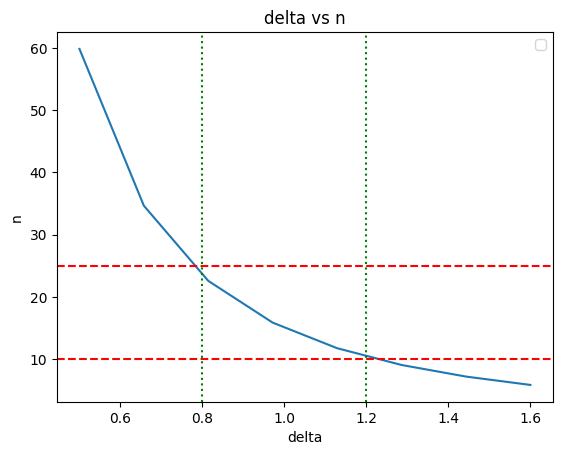

In [ ]:
# plot of delta vs n
func_parameter_relationshiops (idsn=dsn_delta_n, xvar='delta ($$)', yvar='n')

**Observation:** As the difference between the treatment and control groups ($\delta$) increases, the sample size increases

---------
# Relationship between sample size and sigma ($\sigma$)
---------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


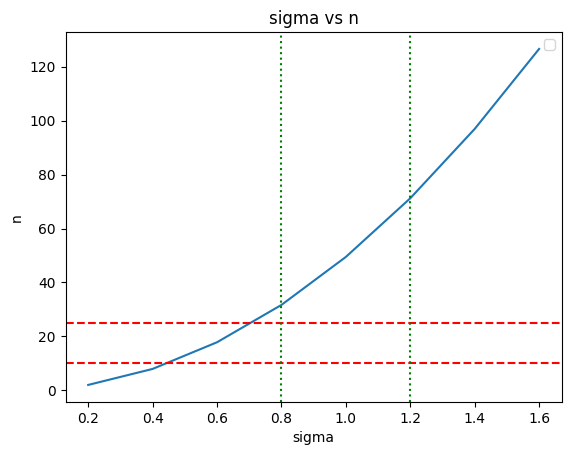

In [228]:
# plot of sigma vs n
func_parameter_relationshiops (idsn=dsn_sigma_n, xvar='sigma', yvar='n')

**Observation:** As the variance or standard deviation ($\sigma$) increases, the sample size increases.